In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score


In [28]:
df = pd.read_csv('penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [30]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [31]:

df = df.dropna(subset=['species', 'sex'])
num_cols = df.select_dtypes(include=['float', 'int']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

C:\Users\user\AppData\Local\Temp\ipykernel_12580\2679197626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [32]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [33]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
df.duplicated().sum()

0

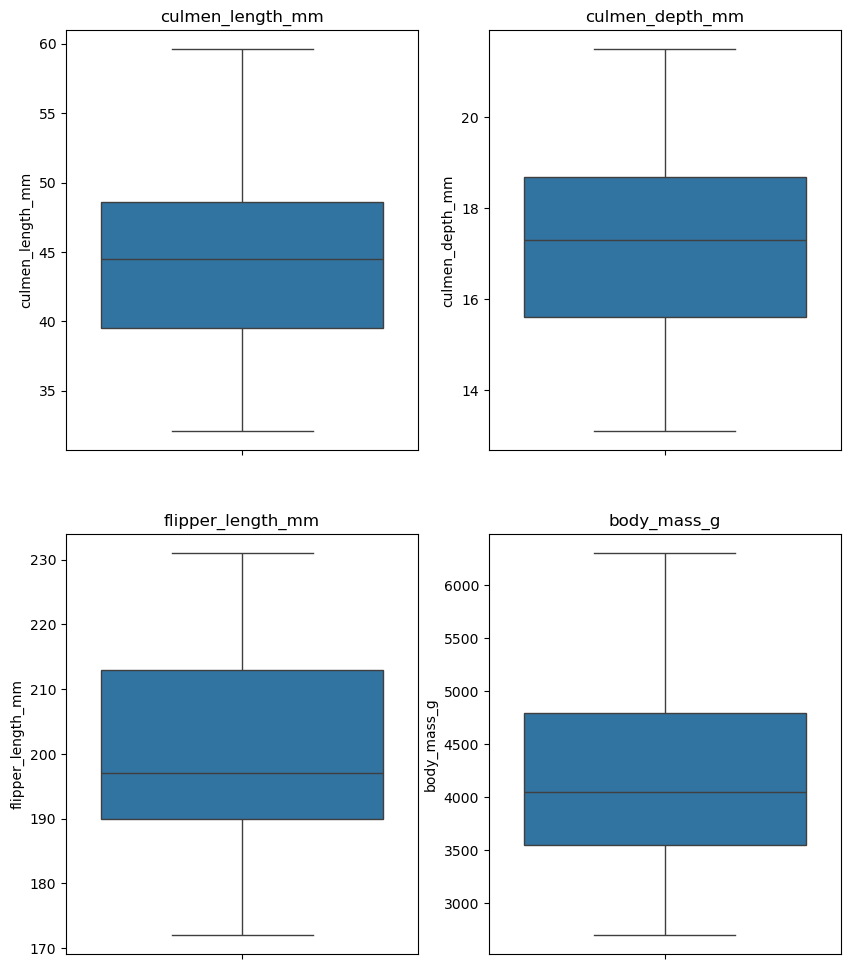

In [35]:
cols = ['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']
fig, axes = plt.subplots(2,2,figsize = (10,12))
axes = axes.ravel() 
for ax, col in enumerate(cols):
    sns.boxplot(y=df[col],ax = axes[ax])
    axes[ax].set_title(col)

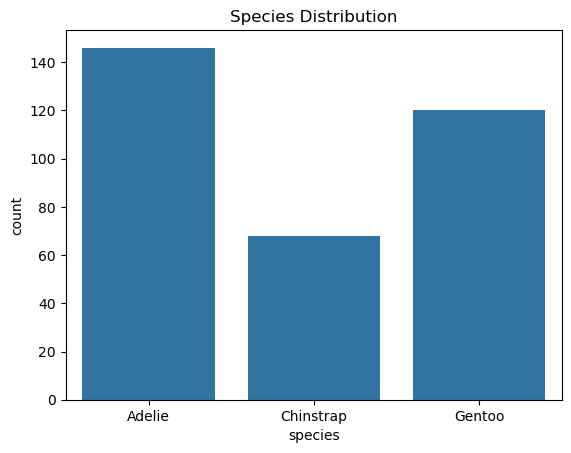

In [36]:

sns.countplot(x='species', data=df)
plt.title("Species Distribution")
plt.show()


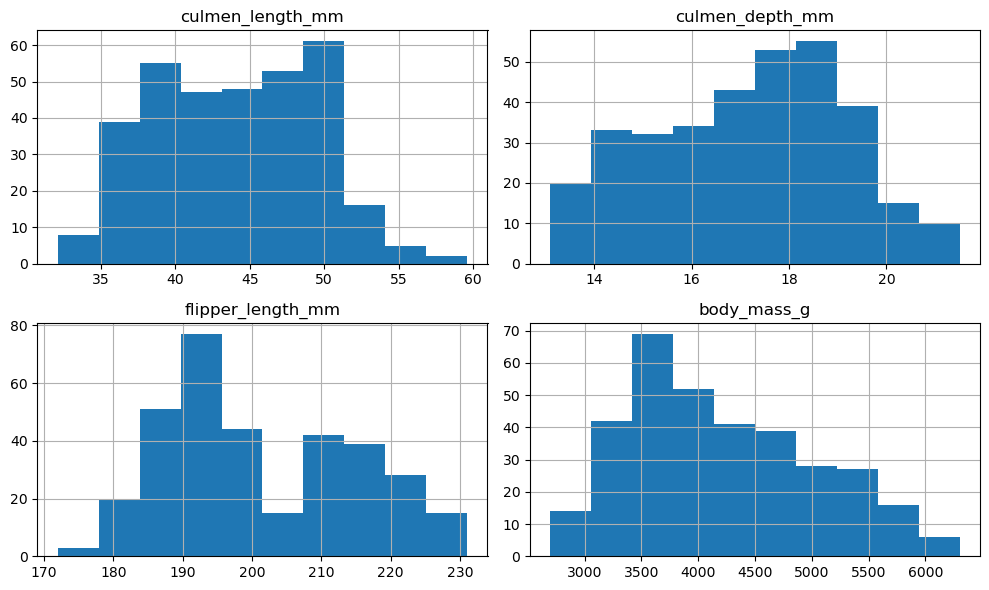

In [37]:
df[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].hist(figsize=(10,6))
plt.tight_layout()
plt.show()


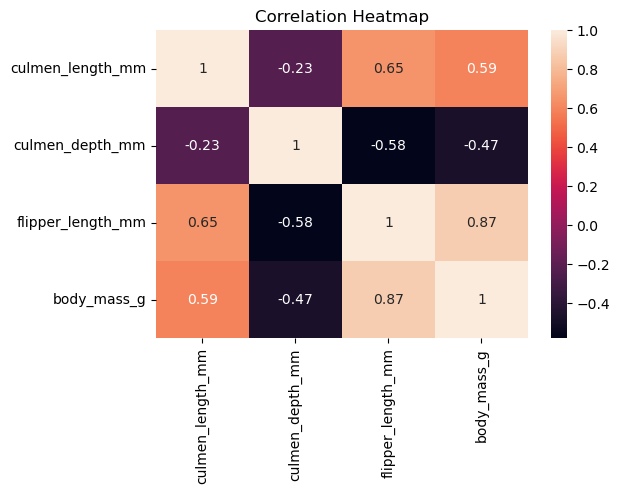

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [39]:
## Encoding

df['sex'] = LabelEncoder().fit_transform(df['sex'])


C:\Users\user\AppData\Local\Temp\ipykernel_12580\156744132.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = LabelEncoder().fit_transform(df['sex'])


In [40]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [41]:

df = pd.get_dummies(df, columns=['island'], drop_first=True)
target_map = {'Adelie':0,'Chinstrap':1,'Gentoo':2}
df['species'] = df['species'].map(target_map)

In [42]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,2,False,True
1,0,39.5,17.4,186.0,3800.0,1,False,True
2,0,40.3,18.0,195.0,3250.0,1,False,True
4,0,36.7,19.3,193.0,3450.0,1,False,True
5,0,39.3,20.6,190.0,3650.0,2,False,True
...,...,...,...,...,...,...,...,...
338,2,47.2,13.7,214.0,4925.0,1,False,False
340,2,46.8,14.3,215.0,4850.0,1,False,False
341,2,50.4,15.7,222.0,5750.0,2,False,False
342,2,45.2,14.8,212.0,5200.0,1,False,False


In [43]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')
    
    results.append([name, acc, f1])
    
    print(f"\n{name}")
    print(classification_report(y_test, preds))
    
results_df = pd.DataFrame(results, columns=['Model','Accuracy','F1 Score'])
results_df


Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        30

    accuracy                           0.99        84
   macro avg       0.98      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84


Decision Tree
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.85      1.00      0.92        17
           2       1.00      0.93      0.97        30

    accuracy                           0.94        84
   macro avg       0.93      0.95      0.94        84
weighted avg       0.95      0.94      0.94        84


KNN
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      1.00      0.97        17
           2       1.00      1.00 

,Model,Accuracy,F1 Score
0,Logistic Regression,0.988095,0.985910
1,Decision Tree,0.940476,0.938648
2,KNN,0.988095,0.985910
3,SVM,0.988095,0.985910
4,Random Forest,1.000000,1.000000


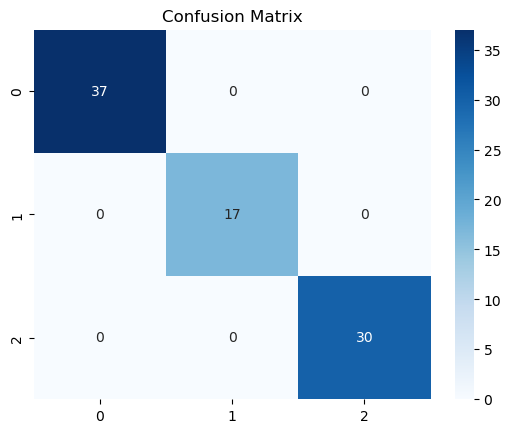

In [47]:
best_model = RandomForestClassifier().fit(X_train, y_train)
best_preds = best_model.predict(X_test)

cm = confusion_matrix(y_test, best_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()